# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

<div style="background-color:powderblue;">
Dado que soy nuevo en la inmobiliaria, lo primero que haría sería reunirme con los tasadores y aprovechar todo su conocimiento y experiencia en la valuación de propiedades. 

    
</br>Asumiendo que ya posee el conocimiento del negocio, y teniendo en cuenta el problema que debemos resolver **"Valuar propiedades"**, acordamos que los principales factores que influyen en una valuación son:
<ul>
  <li><b>Ubicación:</b> La ubicación en la que se encuentra la ubicación es un factor determinante en su valuación</li>
    <li><b>Superficie total de la propiedad:</b> La superficie del terreno, ya sea cubierta o no</li>
    <li><b>Superficie cubierta:</b> Superficie cubierta, en m2 que ocupa la construcción</li>
    <li><b>Nro de habitaciones:</b> Cantidad de habitaciones</li>    
    <li><b>Nro de baños:</b> Cantidad de baños</li>      
    <li><b>Nro. de cocheras:</b> Si posee o no cocheras y su capacidad (uno, dos vehículos)</li>
    <li><b>Tipo de propiedad:</b> Casa, departamento, etc</li>    
    <li><b>Mercado:</b> El mercado puede fluctuar y esto puede hacer que el valor de una misma propiedad cambie en determinados momentos</li>    
</ul> 
</div>

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [24]:
# Cargamos todas las librerias que utilizaremos en este notebooks.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [25]:
# Caramos el DS y transformamos las datos fecha a formato fecha
propiedades = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv',parse_dates=['start_date','end_date','created_on'])

In [26]:
# Mostramos cuentas filas y columnas tiene nuestro DS
filas, columnas = propiedades.shape
print('Nuestro dataset tiene', filas,'filas y',columnas,'columnas')

Nuestro dataset tiene 146660 filas y 19 columnas


In [27]:
# Mostramos las primeras 5 filas
propiedades.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [28]:
# imputamos las valores en la columna end_date como la fecha 12 de diciembre de 9999
# se entiende que son operaciones que no se han cerrado y por el momento no descartamos estos valores
propiedades.replace('9999-12-31',pd.NA,inplace=True)
propiedades.end_date = propiedades.end_date.astype('datetime64')

In [29]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       146660 non-null  datetime64[ns]
 1   end_date         121559 non-null  datetime64[ns]
 2   created_on       146660 non-null  datetime64[ns]
 3   lat              136735 non-null  float64       
 4   lon              136701 non-null  float64       
 5   l1               146660 non-null  object        
 6   l2               146660 non-null  object        
 7   l3               146660 non-null  object        
 8   rooms            146660 non-null  float64       
 9   bedrooms         146660 non-null  float64       
 10  bathrooms        140703 non-null  float64       
 11  surface_total    126133 non-null  float64       
 12  surface_covered  125046 non-null  float64       
 13  price            146660 non-null  float64       
 14  currency         146

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [30]:
# Cantidad de NA en el DS por cada columna
propiedades.isna().sum()

start_date             0
end_date           25101
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [31]:
# Imprimimos cuantos tipos de propiedad existen en nuestro DS y la cantidad de propiedades por cada tipo de propiedad
print('Existen', len(propiedades['property_type'].unique()), 'tipos de propiedades, y cada una posee la siguiente cantidad de propiedades')
df_tmp = pd.DataFrame(propiedades.groupby('property_type').size()).reset_index()
df_tmp.rename(columns={'property_type':'Tipo de propiedad',0:'Cantidad'},inplace=True)
df_tmp.sort_values(by='Cantidad',ascending=False)

Existen 10 tipos de propiedades, y cada una posee la siguiente cantidad de propiedades


,Tipo de propiedad,Cantidad
3,Departamento,107326
0,Casa,21521
9,PH,14298
6,Lote,1312
7,Oficina,658
8,Otro,374
5,Local comercial,325
1,Casa de campo,322
4,Depósito,265
2,Cochera,259


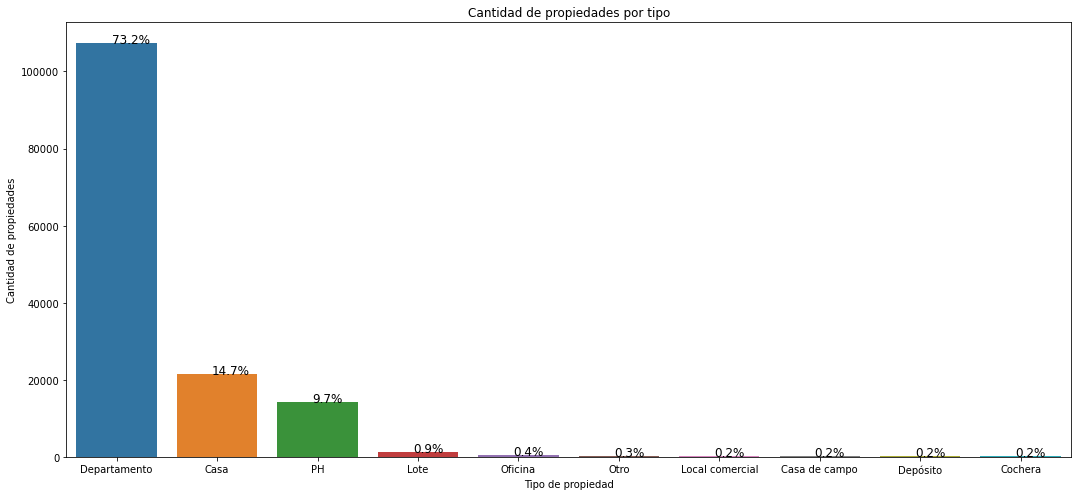

In [32]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
plt.figure(figsize=(18,8))
ax = sns.countplot(data=propiedades,
             x='property_type',
             order = propiedades['property_type'].value_counts().index)
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad de propiedades')
#plt.yscale('log')
plt.title('Cantidad de propiedades por tipo')
without_hue(ax,propiedades.property_type)
plt.show()

<div style="background-color:powderblue;">
Si observamos el grafico anterior podemos notar que los tres primeros tipos de propiedad poseen el **97,6%** del total del DS
    
</br><ul>
<li> Departamentos: 73,2 %</li>
<li> Casas 14,7%</li>
<li> PH 9,7%</li>
</ul>

</br> Este desbalanceo de nuestro ds podría llegar a generar problemas al momento de entrenar y realizar predicciones, aunque en este ejercicio, más adelante solo nos quedamos con los tres primeros y esto "soluciona" el problema.
</div>

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [33]:
# Creamos algunos dataframes para facilitar graficar

# Agrupamos las zonas y contamos cuantas propiedades existen
df_l2 = pd.DataFrame(propiedades.groupby('l2').size()).reset_index().sort_values(by=0, ascending=False)

# Agrupamos los barrios y contamos cuantas propiedades existen
df_l3 = pd.DataFrame(propiedades.groupby('l3').size()).reset_index().sort_values(by=0, ascending=False)
# Como existen demasiados para graficarlos, tomamos los n primerios y al resto los agrupamos en otros
df_l3['l3'].iloc[40:] = 'Otros'
df_l3 = pd.DataFrame(df_l3.groupby('l3').sum()).reset_index().sort_values(by=0, ascending=False)
df_l3_tmp = df_l3[df_l3['l3']=='Otros']
df_l3 = df_l3[df_l3['l3'] !='Otros']
df_l3 = pd.concat([df_l3,df_l3_tmp],axis=0,ignore_index=True)


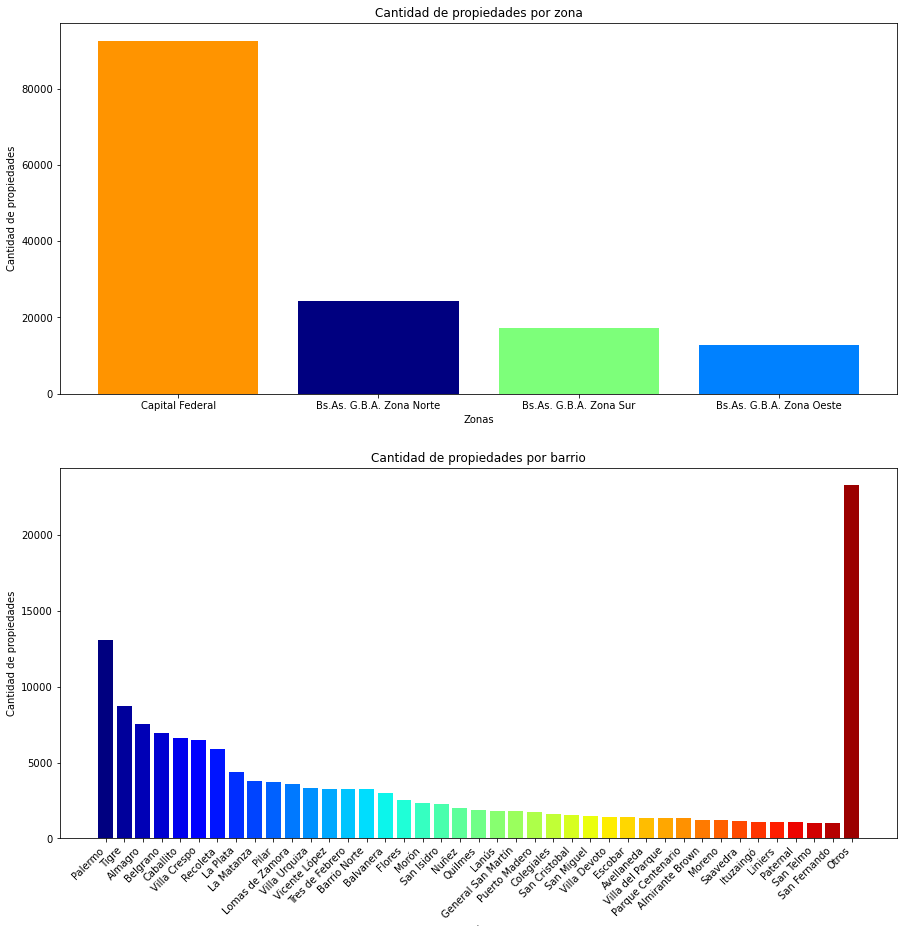

In [34]:
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=len(df_l2))
fig, ax = plt.subplots(2,figsize=(15,15))
ax[0].bar(df_l2['l2'], df_l2[0],color=my_cmap(my_norm(df_l2['l2'].index)))
ax[0].set_title('Cantidad de propiedades por zona')
ax[0].set_xlabel('Zonas')
ax[0].set_ylabel('Cantidad de propiedades')

my_norm = Normalize(vmin=0, vmax=len(df_l3))
ax[1].bar(df_l3['l3'], df_l3[0],color=my_cmap(my_norm(df_l3['l3'].index)))
ax[1].axes.xaxis.label.set_size(1)
ax[1].title.set_text('Cantidad de propiedades por barrio')
plt.xticks(rotation=45, horizontalalignment='right')
ax[1].set_xlabel('Barrio')
ax[1].set_ylabel('Cantidad de propiedades')

plt.show()

<div style="background-color:powderblue;">
</br> En el **Grafico de cantidad de propiedades por zona**, se puede obsevar que la mayoría de los datos (63%) pertenecen a "Capital Federal"

</br> En el caso del segundo grafico, **Propiedades por barrio**, los datos esta más balanceados, el barrio que más propiedades posee es "Palermo" con un 9%~ de las propiedades, con el fin de hacer el grafico más visible, se muestran en detalle los primeros 40 barrios y el resto se agruan en "Otros", ese último grupo posee el 15%~ de las propiedades.
</div>

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [35]:
# Filtramos los datos como se solicita en el pto, e imprimimos su shape (cantidad de filas y columnas), las mismas coinciden con las indicadas en el checkpoint
propiedades_final = propiedades[propiedades['property_type'].isin(['Departamento', 'Casa','PH']) &
                               propiedades['l2'].isin(['Capital Federal'])].copy()
propiedades_final.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [36]:
# Definimos cuales seras las variables con las que vamos a trabajar, y las guardo en una lista
variables = ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']
#Filtramos los datos y nos quedamos con las variables a estudiar
propiedades_final = propiedades_final[variables]
# con el comando describe podemos ver los estadísticos básicos
propiedades_final.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


### Algunas funciones que utilizamos para realizar el análisis y manipulación de los datos

In [37]:
def descartar_registros(df, condicion,variable,descripcion):
    '''
    Esta función se utiliza para descartar registros del df principal
    y moverlos a un df de descartados, indicando el motivo por el cual
    fue descartado.
    parametros:
    condición: mascara que debe aplicarse al df
    variable: que varibale estamos evaluando
    descripción: texto que indique el motivo por el cual fue descartado
    retorno:
    devuelve un df con los registros descartados
    '''
    propiedades_descartadas_tmp = df.loc[condicion].copy()
    propiedades_descartadas_tmp['variable'] = variable
    propiedades_descartadas_tmp['motivo'] = descripcion
    df.drop(propiedades_descartadas_tmp.index, inplace=True,axis=0)

    return propiedades_descartadas_tmp

# inicializamos 
propiedades_descartadas = pd.DataFrame(columns=propiedades_final.columns.to_list()).copy()
propiedades_descartadas['variable'] = ''
propiedades_descartadas['motivo'] = ''

In [38]:
def analisis_variables(df, variable,variable_texto):
    '''
    Esta función se utiliza crear los graficos para cada una de las variables
    parametros:
    df: dataframe a analizar
    varibale: variable que se dese graficar
    variable_texto: nombre a imprimir/vizualizar
    '''
    f, axes = plt.subplots(1,2, figsize=(20, 4), sharex=True)
    sns.distplot(df[variable], ax=axes[0], kde=False)
    axes[0].set(xlabel='Cantidad de '+variable_texto, ylabel='Cantidad de instancias')
    sns.boxplot(data=df,x=variable,y='property_type')
    axes[1].set(xlabel='Cantidad de '+variable_texto, ylabel='Tipo de propiedad')

    plt.show()

In [39]:
def tres_sigmas(df,variable,variable_groupby):
    Q1 = propiedades_final[[variable,variable_groupby]].groupby(variable_groupby).quantile(0.25)
    Q1 = Q1.rename(columns={variable:'Q1'})
    Q3 = propiedades_final[[variable,variable_groupby]].groupby(variable_groupby).quantile(0.75)
    Q3 = Q3.rename(columns={variable:'Q3'})
    IQR_df = pd.concat([Q1,Q3],axis=1) 
    IQR_df['IQR'] = IQR_df['Q3'] - IQR_df['Q1']
    IQR_df['Q1_ol'] = IQR_df['Q1'] - 1.5 * IQR_df['IQR']
    IQR_df['Q3_ol'] = IQR_df['Q3'] + 1.5 * IQR_df['IQR']
    return IQR_df

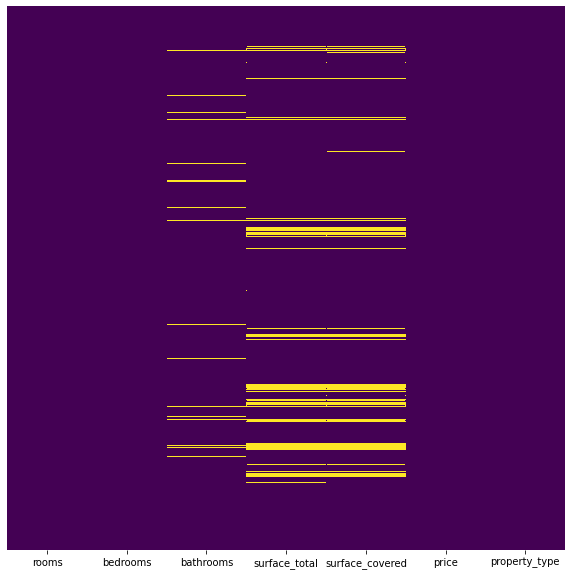

rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

In [40]:
# Analizamos los datos faltantes, primero mediante un grafico y luego se imprime una lista con los valores faltantes de cada variable
plt.figure(figsize=(10,10))
sns.heatmap(propiedades_final[variables].isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.show()
propiedades_final[variables].isnull().sum()

In [41]:
# Primer filtrado del DS, quitando los NA y aplicando las condiciones que se establecen en el pto anterior
# quitamos los NA
condicion = propiedades_final.bathrooms.isna()
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'bathrooms','Descartado por dato faltante')])
condicion = propiedades_final.surface_total.isna()
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'surface_total','Descartado por dato faltante')])
condicion = propiedades_final.surface_covered.isna()
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'surface_covered','Descartado por dato faltante')])

# quitamos superficie menor a 15 o superior a 100
condicion = propiedades_final.surface_total < 15 
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'surface_covered','Inferior a 15 o superior a 1000')])
condicion = propiedades_final.surface_total > 1000
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'surface_covered','Inferior a 15 o superior a 1000')])

# quitamos precios superiores a 4000000
condicion = propiedades_final.price > 4000000 
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'price','Precio superior a 4000000')])

In [42]:
# Luego del primer filtrado nos quedamos con 81k~ y descartamos 10k~
propiedades_final.shape, propiedades_descartadas.shape

((81019, 7), (10466, 9))

# Análisis de las distintas variables

## Variable: rooms

Definición del campo: rooms - Cantidad de ambientes (útil en Argentina).

In [43]:
# Estadisticos basicos
pd.DataFrame(propiedades_final.rooms.describe()).style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'})

,rooms
count,81019.000000
mean,3.009652
std,1.308602
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,26.000000


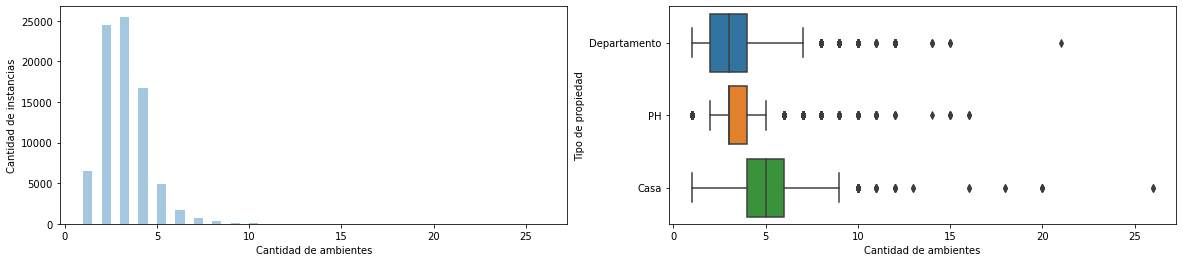

In [44]:
# graficamos la variable para conocer su distribución
v = 'rooms'
v_texto = 'ambientes'
analisis_variables(propiedades_final, variable=v,variable_texto=v_texto)

<div style="background-color:powderblue;">
Del los graficos anteriores podemos determinar que la gran mayoría de la propiedades tiene hasta 10 ambientes y que el tipo de propiedad incide en la cantidad de ambientes que normalmente posee.

Aplicaremos la regla de los tres sigmas para determinar cuales serían esos límites 
</div>

In [45]:
filtro_3_sigmas = tres_sigmas(propiedades_final,'rooms','property_type') 
filtro_3_sigmas\
    .style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'}) \
    .format("{:.2}")

,Q1,Q3,IQR,Q1_ol,Q3_ol
property_type,,,,,
Casa,4.0,6.0,2.0,1.0,9.0
Departamento,2.0,4.0,2.0,-1.0,7.0
PH,3.0,4.0,1.0,1.5,5.5


<div style="background-color:powderblue;">
    <p>La tabla tanerior nos devuelve</p>
    <ul>
        <li><b>Q1</b>: Primer cuartil</li>
        <li><b>Q3</b>: Tercer cuartil</li>
        <li><b>IRQ</b>: Rango intercuartilico</li>
        <li><b>Q1_ol</b>: Limite inferior</li>
        <li><b>Q1_ol</b>: Limite superior</li>
    </ul>
</div>

In [46]:
# ponemos todo en un mismo DF
propiedades_final_tmp = propiedades_final.join(filtro_3_sigmas,on='property_type')

condicion = propiedades_final_tmp.rooms < propiedades_final_tmp.Q1_ol
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'rooms','Inferior tres sigmas')])

condicion = propiedades_final_tmp.rooms > propiedades_final_tmp.Q3_ol
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'rooms','Superior tres sigmas')])
del propiedades_final_tmp

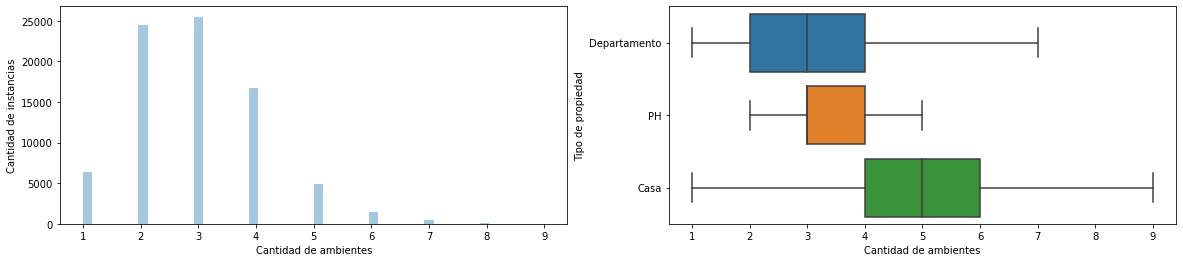

In [47]:
# Ahora volvemos a graficar, con el DF limpio
v = 'rooms'
v_texto = 'ambientes'
analisis_variables(propiedades_final, variable=v,variable_texto=v_texto)

## Variable: bedrooms

Definición del campo: bedrooms - Cantidad de dormitorios (útil en el resto de los países).

In [48]:
# Estadisticos basicos
pd.DataFrame(propiedades_final.bedrooms.describe()).style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'})

,bedrooms
count,79916.000000
mean,1.960421
std,0.959727
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,15.000000


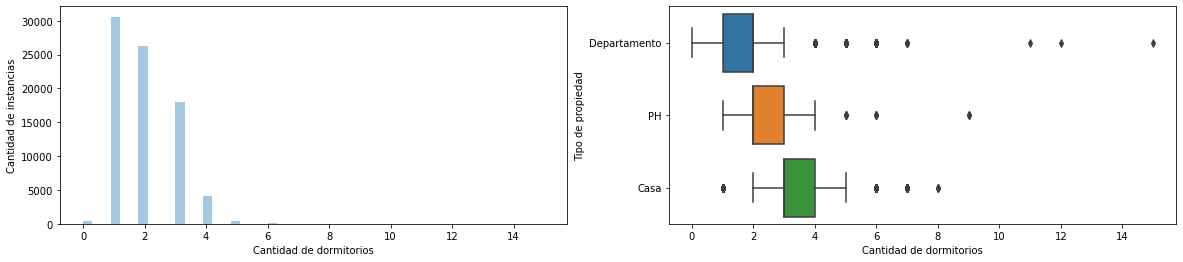

In [49]:
# graficamos la variable para conocer su distribución
v = 'bedrooms'
v_texto = 'dormitorios'
analisis_variables(propiedades_final, variable=v,variable_texto=v_texto)

<div style="background-color:powderblue;">
Similar a lo que ocurria con la variable anterior vemos que tenemos dato atipicos, la mayoria de los datos tiene un maximo de 6 dormitorios, y el tipo de propiedad influye en la cantidad de dormitorios. Pero en este caso ignoraremos el limite inferior, ya que podría haber propiedades donde no tengan dormitorios, ejemplo una oficina.
    
Aplicaremos la regla de los tres sigmas para determinar cuales serían esos límites 
</div>

In [50]:
filtro_3_sigmas = tres_sigmas(propiedades_final,'bedrooms','property_type') 
filtro_3_sigmas\
    .style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'}) \
    .format("{:.2}")

,Q1,Q3,IQR,Q1_ol,Q3_ol
property_type,,,,,
Casa,3.0,4.0,1.0,1.5,5.5
Departamento,1.0,2.0,1.0,-0.5,3.5
PH,2.0,3.0,1.0,0.5,4.5


In [51]:
# ponemos todo en un mismo DF
propiedades_final_tmp = propiedades_final.join(filtro_3_sigmas,on='property_type')

#condicion = propiedades_final_tmp.bedrooms < propiedades_final_tmp.Q1_ol
#propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'bedrooms','Inferior tres sigmas')])

condicion = propiedades_final_tmp.bedrooms > propiedades_final_tmp.Q3_ol
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'debrooms','Superior tres sigmas')])
del propiedades_final_tmp

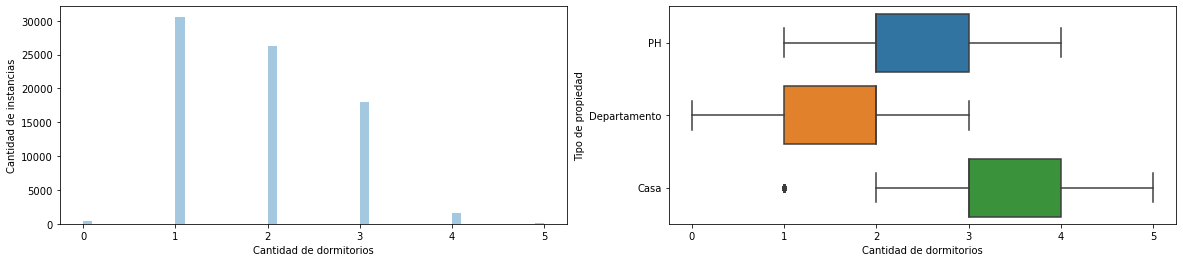

In [52]:
# graficamos la variable para conocer su distribución
v = 'bedrooms'
v_texto = 'dormitorios'
analisis_variables(propiedades_final, variable=v,variable_texto=v_texto)

## Variable: bathrooms

Definición del campo: bathrooms - Cantidad de baños

In [54]:
# Estadisticos basicos
pd.DataFrame(propiedades_final.bathrooms.describe()).style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'})

,bathrooms
count,76888.000000
mean,1.479529
std,0.756689
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


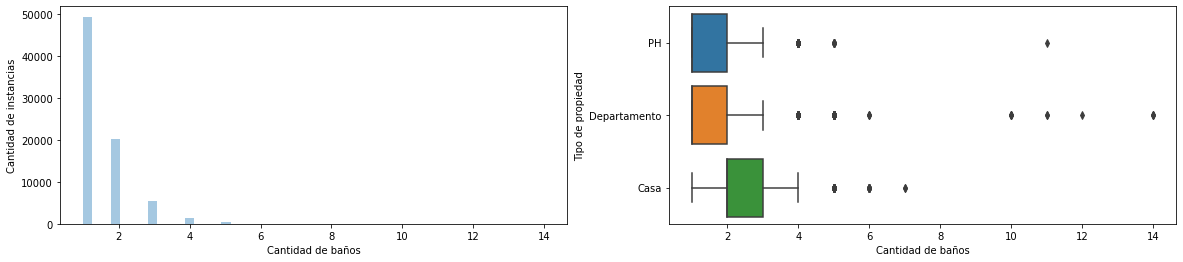

In [55]:
# graficamos la variable para conocer su distribución
v = 'bathrooms'
v_texto = 'baños'
analisis_variables(propiedades_final, variable=v,variable_texto=v_texto)

<div style="background-color:powderblue;">
Muy similar a la variable anterior
    
Aplicaremos la regla de los tres sigmas para determinar cuales serían esos límites 
</div>

In [56]:
filtro_3_sigmas = tres_sigmas(propiedades_final,'bathrooms','property_type') 
filtro_3_sigmas\
    .style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'}) \
    .format("{:.2}")

,Q1,Q3,IQR,Q1_ol,Q3_ol
property_type,,,,,
Casa,2.0,3.0,1.0,0.5,4.5
Departamento,1.0,2.0,1.0,-0.5,3.5
PH,1.0,2.0,1.0,-0.5,3.5


In [59]:
# ponemos todo en un mismo DF
propiedades_final_tmp = propiedades_final.join(filtro_3_sigmas,on='property_type')

#condicion = propiedades_final_tmp.bedrooms < propiedades_final_tmp.Q1_ol
#propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'bedrooms','Inferior tres sigmas')])

condicion = propiedades_final_tmp.bathrooms > propiedades_final_tmp.Q3_ol
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'bathrooms','Superior tres sigmas')])
del propiedades_final_tmp

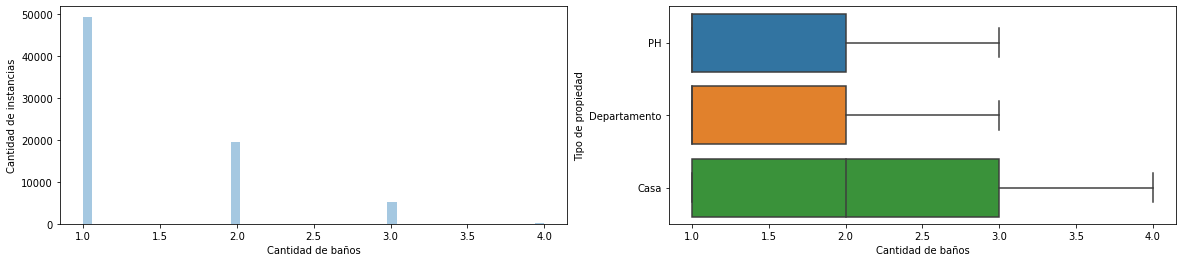

In [60]:
# graficamos la variable para conocer su distribución
v = 'bathrooms'
v_texto = 'baños'
analisis_variables(propiedades_final, variable=v,variable_texto=v_texto)

## Variable: surface_total

Definición del campo: surface_total - Superficie total en m²

In [62]:
# Estadisticos basicos
pd.DataFrame(propiedades_final.surface_total.describe()).style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'})

,surface_total
count,74222.000000
mean,82.871804
std,57.426150
min,15.000000
25%,48.000000
50%,67.000000
75%,98.000000
max,1000.000000


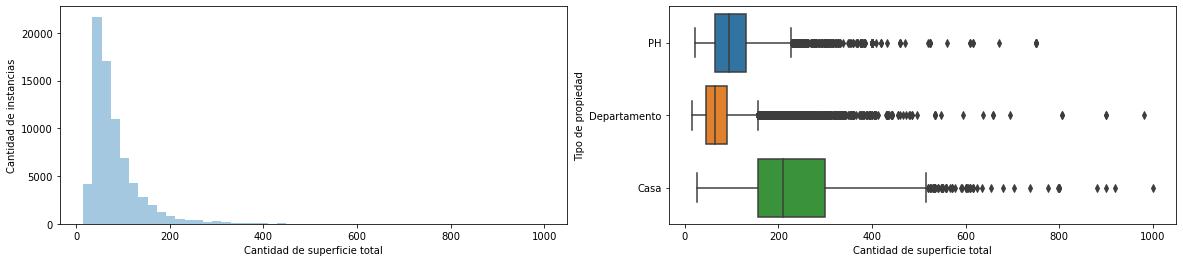

In [63]:
# graficamos la variable para conocer su distribución
v = 'surface_total'
v_texto = 'superficie total'
analisis_variables(propiedades_final, variable=v,variable_texto=v_texto)

<div style="background-color:powderblue;">
ANALIZAR
    
Aplicaremos la regla de los tres sigmas para determinar cuales serían esos límites 
</div>

In [67]:
filtro_3_sigmas = tres_sigmas(propiedades_final,'surface_total','property_type') 
filtro_3_sigmas\
    .style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'white'}) \
    .format("{:0}")

,Q1,Q3,IQR,Q1_ol,Q3_ol
property_type,,,,,
Casa,156.0,300.0,144.0,-60.0,516.0
Departamento,46.0,90.0,44.0,-20.0,156.0
PH,65.0,130.0,65.0,-32.5,227.5


In [68]:
# ponemos todo en un mismo DF
propiedades_final_tmp = propiedades_final.join(filtro_3_sigmas,on='property_type')

#condicion = propiedades_final_tmp.surface_total < propiedades_final_tmp.Q1_ol
#propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'bedrooms','Inferior tres sigmas')])

condicion = propiedades_final_tmp.surface_total > propiedades_final_tmp.Q3_ol
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(propiedades_final, condicion,'surface_total','Superior tres sigmas')])
del propiedades_final_tmp

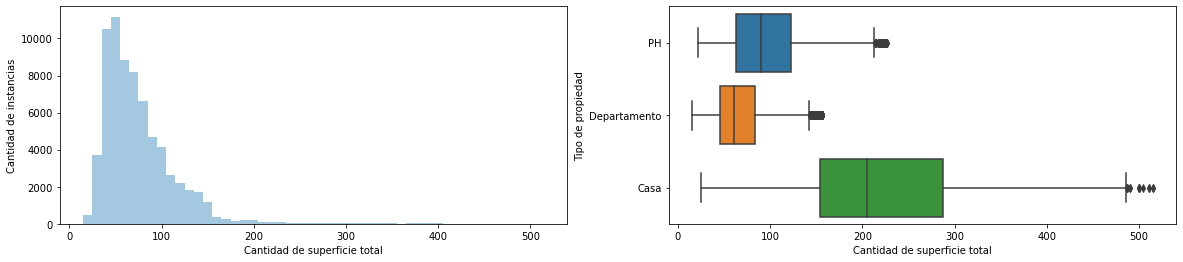

In [69]:
# graficamos la variable para conocer su distribución
v = 'surface_total'
v_texto = 'superficie total'
analisis_variables(propiedades_final, variable=v,variable_texto=v_texto)

In [ ]:
for v in set(variables) - {'property_type'}:
    analisis_variables(propiedades_final, variable=v,variable_texto=v)

In [ ]:
sns_plot = sns.pairplot(data=propiedades_final,hue='property_type')
sns_plot.savefig("pairplot.png")


7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
plt.figure(figsize=(10,10))
matrix = np.triu(propiedades_final.corr())
sns_plot = sns.heatmap(propiedades_final.corr(),cmap='viridis',mask=matrix, annot = True)
figure = sns_plot.get_figure()  
figure.savefig("matrix.png")
propiedades_final.corr()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


<div style="background-color:powderblue;">
Pregunta planteada: como varía el valor por metro de construccion por metro cuadrado cubierto de acuerdo al tipo de propiedad?
</div>   


In [ ]:
df_tmp = propiedades_final[['property_type','price','surface_covered']].groupby('property_type').sum()
df_tmp['precio_por_metro_cubierto'] = df_tmp['price'] / df_tmp['surface_covered']
df_tmp[['precio_por_metro_cubierto']].sort_values(by='precio_por_metro_cubierto',  ascending=False)

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
propiedades_final.drop('property_type', axis=1, inplace=True)
propiedades_final.shape

# Creamos un modelo benckmark y trateremos de morarlo

In [ ]:
resultados = []
# Separamos en variables predictoras (X) y la variable objetivo (y)
X = propiedades_final[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = propiedades_final['price']

# Separamos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1975)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
resultados.append(['LinearRegression - Benchmark','NA','NA',rmse_train,rmse_test])
resultados = pd.DataFrame(resultados)
resultados.rename({0:'Modelo',1:'Metrica',2:'Nro. de vecinos',3:'rmse_train',4:'rmse_test'},axis=1,inplace=True)

# Probamos con distintos hiperparametros en un modelo DecisionTreeRegressor

In [ ]:
profundidades = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]
criterion = ['mse','mae','friedman_mse']

for profundidad in profundidades:
    for c in criterion:
        tree_regressor = DecisionTreeRegressor(max_depth=profundidad, criterion=c,random_state=42)
        tree_regressor.fit(X_train, y_train)
        y_pred_train = tree_regressor.predict(X_train)
        y_pred_test = tree_regressor.predict(X_test)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        resultados = resultados.append({'Modelo':'TreeRegressor','Metrica':c,'Nro. de vecinos':profundidad,'rmse_train':rmse_train,'rmse_test':rmse_test},ignore_index=True)

# Probamos con distintos hiperparametros en un modelo DecisionTreeRegressor

In [ ]:
metricas = ['euclidean','manhattan','chebyshev','minkowski']
n_vecinos_lista = [1,2,3,4,5,6,7,8,9,10,12,14,16,20,40,100]
for n_vecinos in n_vecinos_lista:
    for metrica in metricas:
        knn_regressor = KNeighborsRegressor(n_neighbors=n_vecinos,metric=metrica)
        knn_regressor.fit(X_train, y_train)
        y_pred_train = knn_regressor.predict(X_train)
        y_pred_test = knn_regressor.predict(X_test)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        resultados.append(['KNN',metrica,n_vecinos,rmse_train,rmse_test])
        resultados = resultados.append({'Modelo':'KNNRegressor','Metrica':metrica,'Nro. de vecinos':n_vecinos,'rmse_train':rmse_train,'rmse_test':rmse_test},ignore_index=True)

# Los 10 modelos con menor error

In [ ]:
resultados.sort_values(by='rmse_test',ignore_index=True,inplace=True)
resultados.head(10)

In [ ]:
# nuestro modelo benckmark queda en la posición 108
resultados[resultados['Modelo'] == 'LinearRegression - Benchmark']

In [ ]:
resultados_top = resultados.head(25)
plt.figure(figsize=(18,10))
plt.plot(resultados_top['Modelo']+'('+resultados_top['Metrica']+' / '+resultados_top['Nro. de vecinos'].astype(str) + ')',resultados_top['rmse_test'], label='Datos de prueba')
#plt.plot(resultados_top['Modelo']+'('+resultados_top['Metrica']+' / '+resultados_top['Nro. de vecinos'].astype(str) + ')',resultados_top['rmse_train'], label='Datos de entrenamiento')
plt.xticks(rotation=45, horizontalalignment='right',size=10)
plt.title('Error en los distintos modelos probados')
plt.ylabel('Error')
plt.xlabel('Modelo')
plt.legend()
plt.show()

<div style="background-color:powderblue;">
Como conclución podemos indicar que el mejor modelo encontrado es de tipo KNNRegressor, con los siguientes hiperparametros:
<ul>
  <li><b>metric: </b>manhattan</li>
    <li><b>n_neighbors: </b>4</li>
    </ul>
    
</div>

# Registros descartados
Resumen de los registros descartados, sería interesante devolverlos para que sean analizados

In [70]:
pd.DataFrame(propiedades_descartadas.groupby(by=['variable','motivo']).size()).sort_values(by=0, ascending=False).rename({0:'Cantidad'},axis=1).reset_index()

,variable,motivo,Cantidad
0,surface_total,Descartado por dato faltante,7630
1,surface_total,Superior tres sigmas,3960
2,debrooms,Superior tres sigmas,3028
3,bathrooms,Superior tres sigmas,2666
4,bathrooms,Descartado por dato faltante,2171
5,rooms,Superior tres sigmas,1004
6,surface_covered,Descartado por dato faltante,474
7,surface_covered,Inferior a 15 o superior a 1000,159
8,rooms,Inferior tres sigmas,99
9,price,Precio superior a 4000000,32


In [ ]:
#propiedades_descartadas.to_csv('registros_descartados.csv')